In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Load the datasets
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

# Merge movie titles with ratings
df = pd.merge(ratings, movies, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
1,3,17,5.0,1084485217,Sense and Sensibility (1995),Drama|Romance
2,15,17,4.5,1289858271,Sense and Sensibility (1995),Drama|Romance
3,28,17,4.0,961513829,Sense and Sensibility (1995),Drama|Romance
4,29,17,4.0,845056111,Sense and Sensibility (1995),Drama|Romance


In [3]:
print("Unique users:", df['userId'].nunique())
print("Unique movies:", df['title'].nunique())
print("Total rows in merged dataframe:", len(df))

Unique users: 200948
Unique movies: 84239
Total rows in merged dataframe: 32000204


In [4]:
# Step 1: Filter popular movies
popular_movies = df['title'].value_counts()
popular_movies = popular_movies[popular_movies >= 300].index

# Step 2: Filter active users
active_users = df['userId'].value_counts()
active_users = active_users[active_users >= 100].index

# Step 3: Final subset of the data
df_small = df[df['title'].isin(popular_movies) & df['userId'].isin(active_users)]
print("Shape after filtering:", df_small.shape)

Shape after filtering: (24879955, 6)


In [5]:
# Now pivot the smaller dataset
user_movie_matrix = df_small.pivot_table(index='userId', columns='title', values='rating')
user_movie_matrix_filled = user_movie_matrix.fillna(0)
user_movie_matrix_filled.head()

title,'71 (2014),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),10 Cloverfield Lane (2016),10 Items or Less (2006),...,"Zorro, the Gay Blade (1981)",Zulu (1964),[REC] (2007),[REC]² (2009),eXistenZ (1999),"tick, tick...BOOM! (2021)",xXx (2002),xXx: Return of Xander Cage (2017),xXx: State of the Union (2005),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# Transpose so each row is a movie (needed for item-item similarity)
movie_ratings_matrix = user_movie_matrix_filled.T

# Compute cosine similarity between movies
movie_similarity = cosine_similarity(movie_ratings_matrix)

# Wrap it as a DataFrame for easy lookup
movie_similarity_df = pd.DataFrame(movie_similarity, 
                                   index=movie_ratings_matrix.index, 
                                   columns=movie_ratings_matrix.index)

movie_similarity_df.head()

title,'71 (2014),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),10 Cloverfield Lane (2016),10 Items or Less (2006),...,"Zorro, the Gay Blade (1981)",Zulu (1964),[REC] (2007),[REC]² (2009),eXistenZ (1999),"tick, tick...BOOM! (2021)",xXx (2002),xXx: Return of Xander Cage (2017),xXx: State of the Union (2005),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.000000,0.000524,0.039936,0.010956,0.088510,0.028603,0.038432,0.035893,0.135243,0.033765,...,0.009224,0.063428,0.094835,0.053490,0.062101,0.040013,0.054476,0.040210,0.039985,0.034725
'Til There Was You (1997),0.000524,1.000000,0.055825,0.059607,0.014526,0.039207,0.042521,0.042232,0.003483,0.017979,...,0.031790,0.009019,0.002049,0.003200,0.030254,0.006989,0.028861,0.002515,0.019265,0.056217
"'burbs, The (1989)",0.039936,0.055825,1.000000,0.058565,0.086425,0.234254,0.111414,0.108534,0.093161,0.057044,...,0.085459,0.075149,0.085698,0.051815,0.144408,0.028061,0.124352,0.042036,0.064988,0.322761
'night Mother (1986),0.010956,0.059607,0.058565,1.000000,0.018465,0.035934,0.102297,0.059958,0.010161,0.017905,...,0.053834,0.037949,0.014493,0.008918,0.037163,0.012477,0.015460,0.003797,0.003416,0.054697
(500) Days of Summer (2009),0.088510,0.014526,0.086425,0.018465,1.000000,0.083009,0.051016,0.044859,0.249398,0.094984,...,0.018703,0.045136,0.167463,0.090707,0.121205,0.112425,0.155661,0.062463,0.079799,0.083430


In [7]:
def recommend_movies(movie_title, similarity_df, top_n=5):
    if movie_title not in similarity_df.columns:
        return f"❌ Movie '{movie_title}' not found in similarity matrix."
    
    # Get similarity scores and sort
    scores = similarity_df[movie_title].sort_values(ascending=False)
    
    # Exclude the movie itself
    recommended = scores.iloc[1:top_n+1]
    
    return recommended


In [8]:
recommend_movies("Toy Story (1995)", movie_similarity_df, top_n=5)

title
Toy Story 2 (1999)                           0.696772
Forrest Gump (1994)                          0.689605
Back to the Future (1985)                    0.680417
Jurassic Park (1993)                         0.679634
Star Wars: Episode IV - A New Hope (1977)    0.679151
Name: Toy Story (1995), dtype: float64

In [9]:
# Load IMDb review dataset
imdb_df = pd.read_csv('IMDB Dataset.csv')

# Preview
print(imdb_df.shape)
imdb_df.head()


(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
import re
from sklearn.preprocessing import LabelEncoder

# Clean reviews: remove HTML tags and lowercase
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # remove HTML
    text = text.lower()                # lowercase
    return text

imdb_df['clean_review'] = imdb_df['review'].apply(clean_text)

# Encode sentiment: positive = 1, negative = 0
label_encoder = LabelEncoder()
imdb_df['sentiment_encoded'] = label_encoder.fit_transform(imdb_df['sentiment'])

# Preview
imdb_df[['clean_review', 'sentiment', 'sentiment_encoded']].head()


,clean_review,sentiment,sentiment_encoded
0,one of the other reviewers has mentioned that ...,positive,1
1,a wonderful little production. the filming tec...,positive,1
2,i thought this was a wonderful way to spend ti...,positive,1
3,basically there's a family where a little boy ...,negative,0
4,"petter mattei's ""love in the time of money"" is...",positive,1


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Convert text to bag-of-words vectors
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(imdb_df['clean_review'])

# Target labels
y = imdb_df['sentiment_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (40000, 5000)
Shape of X_test: (10000, 5000)


In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred = nb_model.predict(X_test)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.8452

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      4961
           1       0.85      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


🧩 Confusion Matrix:
 [[4220  741]
 [ 807 4232]]


In [13]:
# Function to clean and vectorize a single review
def predict_sentiment(review_text):
    cleaned = clean_text(review_text)
    vector = vectorizer.transform([cleaned])
    pred = nb_model.predict(vector)[0]
    label = label_encoder.inverse_transform([pred])[0]
    return label

# Try with custom examples
print(predict_sentiment("I absolutely loved this movie. It was emotional and powerful."))
print(predict_sentiment("Worst film ever. Terrible acting and slow plot."))
print(predict_sentiment("Meh. Not bad, not great, just okay."))


positive
negative
negative


In [14]:
# Sample mock reviews (in practice, you'd pull these from IMDb or user feedback)
mock_reviews = {
    "Toy Story 2 (1999)": "Even better than the first! Heartwarming and fun.",
    "Forrest Gump (1994)": "A timeless classic. Forrest is such a lovable character.",
    "Back to the Future (1985)": "An overrated mess. I couldn’t finish it.",
    "Jurassic Park (1993)": "Scary, thrilling, and visually stunning.",
    "Star Wars: Episode IV - A New Hope (1977)": "Way too slow and outdated for today's audience."
}

# Add sentiment prediction to recommendations
recommendation_with_sentiment = []

top_movies = recommend_movies("Toy Story (1995)", movie_similarity_df, top_n=5)

for movie, score in top_movies.items():
    review = mock_reviews.get(movie, "This movie was okay.")
    sentiment = predict_sentiment(review)
    recommendation_with_sentiment.append((movie, round(score, 3), sentiment, review))

# Display nicely
import pandas as pd
pd.DataFrame(recommendation_with_sentiment, columns=['Movie', 'Similarity Score', 'Sentiment', 'Sample Review'])

,Movie,Similarity Score,Sentiment,Sample Review
0,Toy Story 2 (1999),0.697,positive,Even better than the first! Heartwarming and fun.
1,Forrest Gump (1994),0.690,positive,A timeless classic. Forrest is such a lovable ...
2,Back to the Future (1985),0.680,negative,An overrated mess. I couldn’t finish it.
3,Jurassic Park (1993),0.680,positive,"Scary, thrilling, and visually stunning."
4,Star Wars: Episode IV - A New Hope (1977),0.679,positive,Way too slow and outdated for today's audience.


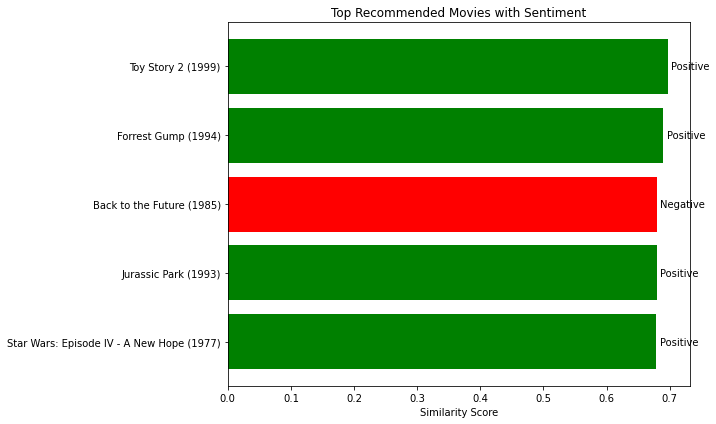

In [15]:
import matplotlib.pyplot as plt

# Create DataFrame
df_vis = pd.DataFrame(recommendation_with_sentiment, columns=['Movie', 'Similarity Score', 'Sentiment', 'Sample Review'])

# Map sentiment to color and label
color_map = {'positive': 'green', 'negative': 'red'}
label_map = {'positive': 'Positive', 'negative': 'Negative'}

df_vis['Color'] = df_vis['Sentiment'].map(color_map)
df_vis['Label'] = df_vis['Sentiment'].map(label_map)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df_vis['Movie'], df_vis['Similarity Score'], color=df_vis['Color'])
plt.xlabel('Similarity Score')
plt.title('Top Recommended Movies with Sentiment')

# Add text labels next to bars
for bar, label in zip(bars, df_vis['Label']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, label, va='center', fontsize=10)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [16]:
!pip install wordcloud

In [19]:
from wordcloud import WordCloud

ValueError: Only supported for TrueType fonts

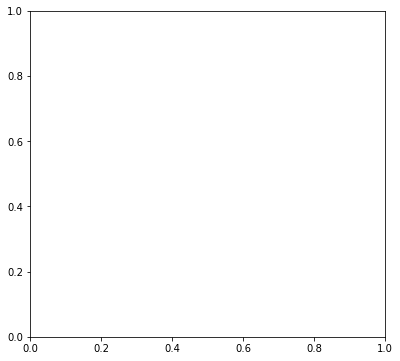

In [20]:
from wordcloud import WordCloud

# Combine reviews by sentiment
positive_reviews = ' '.join(df_vis[df_vis['Sentiment'] == 'positive']['Sample Review'])
negative_reviews = ' '.join(df_vis[df_vis['Sentiment'] == 'negative']['Sample Review'])

# WordCloud plot
plt.figure(figsize=(14, 6))

# Positive
plt.subplot(1, 2, 1)
wc_pos = WordCloud(background_color='white', colormap='Greens').generate(positive_reviews)
plt.imshow(wc_pos, interpolation='bilinear')
plt.title('Positive Sentiment WordCloud', fontsize=14)
plt.axis('off')

# Negative
plt.subplot(1, 2, 2)
wc_neg = WordCloud(background_color='white', colormap='Reds').generate(negative_reviews)
plt.imshow(wc_neg, interpolation='bilinear')
plt.title('Negative Sentiment WordCloud', fontsize=14)
plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
df1 = pd.read_csv('ratings.csv')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB


In [7]:
df1.describe()

,userId,movieId,rating,timestamp
count,3.200020e+07,3.200020e+07,3.200020e+07,3.200020e+07
mean,1.002785e+05,2.931861e+04,3.540396e+00,1.275241e+09
std,5.794905e+04,5.095816e+04,1.058986e+00,2.561630e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,5.005300e+04,1.233000e+03,3.000000e+00,1.051012e+09
50%,1.002970e+05,3.452000e+03,3.500000e+00,1.272622e+09
75%,1.504510e+05,4.419900e+04,4.000000e+00,1.503158e+09
max,2.009480e+05,2.927570e+05,5.000000e+00,1.697164e+09


In [8]:
df1.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df1['rating'], bins=10, kde=True)
plt.title("Rating Distribution")
